## Backpropagation Exercise
In this exercise we will use backpropagation to train a multi-layer perceptron (MLP). Multilayer perceptrons can be called the 'basic' variety of neural networks. They have an input layer, a number of hidden layers, and an output layer. First, let's create our input.

This code below generates two input values (x) and an output value (y) according to different patterns that are not linear.
It also adds a bias term (a vector of 1s) to the input. Adding a bias term to the input like this and initialising it to 1 is a trick that often improves performance. This bias term is not directly updated, but the weight matrix will include a row that, when multiplied with our x_mat_full, does with the bias term what the algorithm deems right for the task.

In [74]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

In [75]:
## create input

num_obs = 500
x = np.random.uniform(-1,1,size = (num_obs,2))
bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x,bias), axis=1)

In [76]:
x

array([[-6.66117518e-02,  5.43124257e-01],
       [-6.62267748e-01,  4.24340593e-01],
       [ 6.97763908e-01,  6.15093646e-01],
       [-7.08534801e-01,  9.87432954e-01],
       [-2.61778025e-01,  3.13726811e-01],
       [ 9.28419235e-02,  3.68599272e-01],
       [ 7.20712457e-01, -5.81646851e-01],
       [-2.70882381e-01, -5.51096077e-01],
       [-2.65970623e-01,  7.67816699e-01],
       [-7.01597742e-01,  7.56547877e-01],
       [-2.15805101e-01, -1.71912117e-01],
       [-7.79819222e-01, -3.54438187e-01],
       [-7.18568908e-01, -4.75473142e-01],
       [-5.52058546e-01, -2.29956415e-01],
       [ 1.56007019e-01,  6.73871062e-01],
       [-3.38462700e-01,  6.66513403e-01],
       [-5.95008522e-01, -3.00716802e-02],
       [ 8.26030239e-01, -7.18526616e-02],
       [-6.72532314e-01,  4.10961945e-01],
       [ 7.57285024e-01,  4.05321990e-01],
       [ 5.15684474e-01,  3.27325813e-01],
       [-3.06359101e-01,  1.27132247e-01],
       [-2.41516731e-01,  9.93619640e-01],
       [-3.

In [77]:
bias

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [78]:
x_mat_full

array([[-0.06661175,  0.54312426,  1.        ],
       [-0.66226775,  0.42434059,  1.        ],
       [ 0.69776391,  0.61509365,  1.        ],
       ...,
       [ 0.41435344, -0.09867293,  1.        ],
       [-0.3474048 ,  0.28261718,  1.        ],
       [-0.07413169, -0.27604256,  1.        ]])

We will see how this architecture can model non-linear patterns in data. We will experiment with different non-linear patterns and see how quickly or slowly the weights converge. We start of by picking just one kind of non-linear categorisation.

shape of x_mat_full is (500, 3)
shape of y is (500,)


<ipython-input-79-c3c3f334a864>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
<ipython-input-79-c3c3f334a864>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


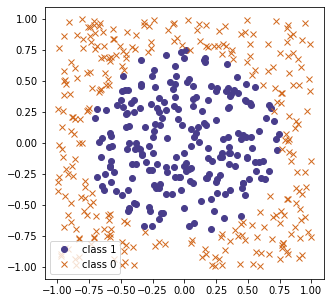

In [79]:
# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
#y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))


fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
ax.legend(loc='best')

The code below gives you the building blocks of the MLP up to the backward pass, which you will write yourself.

In [80]:
def activate(x, deriv=False):
    """ 
    Based on the presence of the second argument, either apply the sigmoid activation 
    function or its derivative
    """
    if (deriv == True):
        return (x * (1 - x))
    return 1 / (1 + np.exp(-x))
    

def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)

def forward_pass(x_mat_full, W_1, W_2):
    """
    Does a forward computation of the neural network
    Takes the input `x` and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    # Forward computation and error
    layer1 = activate(np.dot(x_mat_full, W_1))
    y_pred = activate(np.dot(layer1, W_2)) 
    l2_error = y - y_pred

    # Computing gradients using backpropagation 
    l2_delta = l2_error * activate(y_pred, deriv=True)
    l1_error = l2_delta.dot(W_2.T)
    l1_delta = l1_error * activate(layer1, deriv=True)
    
    gradient2 = layer1.T.dot(l2_delta)
    gradient1 = x_mat_full.T.dot(l1_delta) 
    
    return y_pred, (gradient1, gradient2)

def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time

First, initialise the parameters. This means determining the following:

#### Size of the network

Hidden layers (or a single hidden layer in this example) can be any size. Layers with more neurons are more powerful, but also more likely to overfit, and take longer to train.
The output layer size corresponds to the number of classes.

#### Number of iterations

This parameter determines how many times the network will be updated. 

#### Learning rate

Each time we update the weights, we do so by taking a step into the direction that we calculated will improve the accuracy of the network. The size of that step is determined by the learning rate. Taking small steps will slow the process down, but taking steps that are too large can cause results to vary wildly and not reach a stable optimum. 

Next, fill in the code below to train a multi-layer perceptron and see if it correctly classies the input.

In [203]:
# Reshape y
#y = y.reshape(500,1)
y = np.array(y).reshape(-1,1)

# Initializing weights
W_1 = np.random.uniform(-1,1,size=(3,3))
W_2 = np.random.uniform(-1,1,size=(3,1))

# Definining number of iterations and learning rate('lr')
num_iter = 5000

learning_rate = 0.015


In [204]:
y

array([[1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
    

In [205]:
W_1

array([[-0.07058325,  0.0939322 , -0.10379256],
       [-0.02586014, -0.97349371, -0.19559992],
       [-0.46462799, -0.78304975, -0.16615153]])

In [206]:
W_2

array([[-0.37114908],
       [-0.05218114],
       [ 0.75959076]])

In [207]:
# Creating empty lists for loss values(error) and accuracy
loss_vals, accuracies = [], []

for j in range(num_iter):
    # Do a forward pass through the dataset and compute the loss
    y_pred,(gradient1, gradient2) = forward_pass(x_mat_full,W_1,W_2)

    
    
    # Decide on intervals and add on the current loss and accuracy to the respective list
    curr_loss = loss_fn(y,y_pred)
    loss_vals.append(curr_loss)
    
    acc = np.sum((y_pred>=0.5) == y)/num_obs
    #acc = accuracy_score(y,y_pred, normalize=False)
    accuracies.append(acc) 
    
    # Updating the weights
    W_1 = (learning_rate*gradient1) + W_1
    W_2 = (learning_rate*gradient2) + W_2

    # print loss and accuracy for every 200th iteration
    if ((j%200) == 0):
        print('iteration {}, log loss is {:4f}, accuracy score is {}'.format(j,curr_loss,acc))
    

iteration 0, log loss is 0.708691, accuracy score is 0.44
iteration 200, log loss is 0.617166, accuracy score is 0.65
iteration 400, log loss is 0.358470, accuracy score is 0.874
iteration 600, log loss is 0.263146, accuracy score is 0.934
iteration 800, log loss is 0.227018, accuracy score is 0.962
iteration 1000, log loss is 0.206125, accuracy score is 0.968
iteration 1200, log loss is 0.191804, accuracy score is 0.976
iteration 1400, log loss is 0.181039, accuracy score is 0.982
iteration 1600, log loss is 0.172474, accuracy score is 0.984
iteration 1800, log loss is 0.165393, accuracy score is 0.984
iteration 2000, log loss is 0.159378, accuracy score is 0.984
iteration 2200, log loss is 0.154164, accuracy score is 0.984
iteration 2400, log loss is 0.149574, accuracy score is 0.984
iteration 2600, log loss is 0.145486, accuracy score is 0.984
iteration 2800, log loss is 0.141807, accuracy score is 0.984
iteration 3000, log loss is 0.138470, accuracy score is 0.984
iteration 3200, l

In [208]:
y

array([[1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
    

In [209]:
y_pred

array([[9.89478810e-01],
       [2.64032048e-01],
       [1.09178602e-01],
       [1.82552973e-02],
       [9.96983689e-01],
       [9.99833633e-01],
       [4.58303177e-03],
       [8.76464650e-01],
       [3.00946775e-01],
       [3.52875133e-02],
       [9.99841822e-01],
       [4.27206218e-01],
       [3.39758296e-01],
       [9.86368270e-01],
       [8.93053678e-01],
       [4.27783602e-01],
       [9.80968325e-01],
       [2.56983550e-01],
       [2.66450191e-01],
       [3.39901100e-01],
       [9.35888855e-01],
       [9.99428607e-01],
       [5.02211584e-02],
       [9.99687196e-01],
       [6.15156739e-01],
       [6.31702170e-02],
       [9.07473510e-02],
       [9.99989243e-01],
       [9.99742630e-01],
       [2.95367164e-01],
       [7.24675654e-01],
       [2.25352411e-02],
       [6.91056745e-02],
       [1.67809591e-02],
       [4.45328230e-02],
       [2.64466542e-01],
       [9.53558244e-01],
       [9.15786214e-04],
       [1.08557284e-01],
       [9.17525611e-01],


In [210]:
accuracies

[0.44,
 0.44,
 0.532,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56

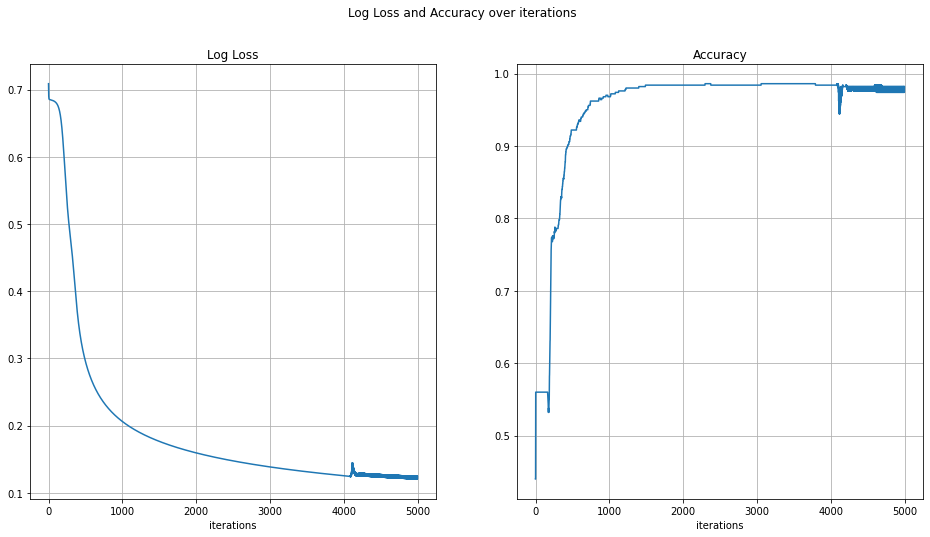

In [211]:
# Plot the loss values and accuracy
plot_loss_accuracy(loss_vals, accuracies)

**Higher number of iterations and lower learning rate seems to improve accuracy**


# References

Gradient retrieved 06/06/2022 from https://machinelearningmastery.com/gradient-in-machine-learning/#:~:text=Gradient%20is%20a%20commonly%20used,learning%20algorithms%20use%20gradient%20information.

Backpropagation retrieved 06/06/2022 from C:\Users\user-pc\Dropbox\nm21070002265\3- Machine Learning\Task 15\DS L3T15 - Neural Networks II_ Training Neural Networks.pdf